# uncertainty range for Legacy Survey $grzW1W2$ photometry
In particular, we'll focus on the range of the BGS


In [1]:
import os
import numpy as np

In [2]:
from astropy.table import Table as aT

In [4]:
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

read BGS catalog and compile photometry. For convenience we're using the Y1 Iron reduction

In [5]:
bgs = aT.read('/global/cfs/projectdirs/desi/survey/catalogs/Y1/LSS/iron/LSScats/v1.2/BGS_ANY_full.dat.fits')

In [42]:
len(bgs)

10824424

0.0106 - 4.5464
0.0197 - 19.7980


/global/homes/c/chahah/.conda/envs/gqp/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  


0.0479 - 13.7842
0.1111 - 8.4622
0.2326 - 14.4642


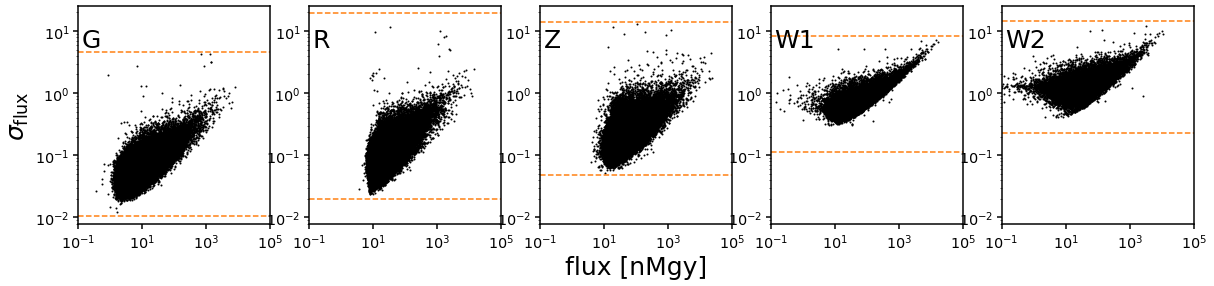

In [48]:
bands = ['G', 'R', 'Z', 'W1', 'W2']

fig = plt.figure(figsize=(20,4))

for i, band in enumerate(bands): 
    sub = fig.add_subplot(1,5,i+1)
    _mag = bgs['FLUX_%s' % band]
    _sig = bgs['FLUX_IVAR_%s' % band]**-0.5
    
    sub.scatter(_mag[::100], _sig[::100], s=1, c='k')
    
    _min, _max = np.quantile(_sig, (0., 0.99999))
    print('%.4f - %.4f' % (_min, _max))
    sub.axhline(_min, color='C1', linestyle='--')
    sub.axhline(_max, color='C1', linestyle='--')    
    
    sub.set_xlim(1e-1, 1e5)
    sub.set_xscale('log')
    if i == 2: sub.set_xlabel('flux [nMgy]', fontsize=25)

    sub.set_ylim(10**-2.1, 25)
    sub.set_yscale('log')
    if i == 0: sub.set_ylabel(r'$\sigma_{\rm flux}$', fontsize=25)
    
    sub.text(0.02, 0.9, band, ha='left', va='top', transform=sub.transAxes, fontsize=25)

9.4699826e-05 150661.64
6.530397e-05 125793.234


/global/homes/c/chahah/.conda/envs/gqp/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
/global/homes/c/chahah/.conda/envs/gqp/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys
/global/homes/c/chahah/.conda/envs/gqp/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  


6.330995e-05 inf
4.2213203e-05 inf
1.8341052e-05 inf


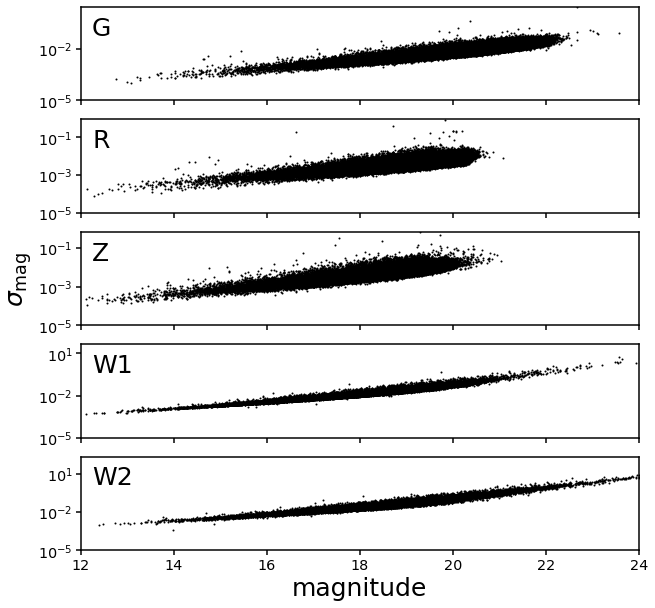

In [21]:

fig = plt.figure(figsize=(10,10))

for i, band in enumerate(bands): 
    sub = fig.add_subplot(5,1,i+1)
    _mag = 22.5 - 2.5 * np.log10(bgs['FLUX_%s' % band])
    _sig = np.abs(-2.5 * (bgs['FLUX_IVAR_%s' % band]**-0.5)/bgs['FLUX_%s' % band]/np.log(10))
    
    sub.scatter(_mag[::100], _sig[::100], s=1, c='k')
    sub.set_xlim(12, 24)
    if i == 4: sub.set_xlabel('magnitude', fontsize=25)
    else: sub.set_xticklabels([])
    print(_sig.min(), _sig.max())
    sub.set_ylim(1e-5, None)
    sub.set_yscale('log')
    if i == 2: sub.set_ylabel(r'$\sigma_{\rm mag}$', fontsize=25)
    
    sub.text(0.02, 0.9, band, ha='left', va='top', transform=sub.transAxes, fontsize=25)